In [ ]:
import json
import pandas as pd
from pprint import pprint
from collections import Counter
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse
from sklearn.model_selection import KFold


import matplotlib.pyplot as plt
import numpy as np


with open('yelp_academic_dataset_business.json', encoding="utf8") as f:
    lines = f.readlines()


In [47]:
data = []
# print(len(lines))
for line in lines:
    parsed_json = json.loads(line)
    categories = []
    if parsed_json['categories']:
        categories = [x.strip() for x in parsed_json['categories'].split(',')]
    if ('Restaurants' in categories and 'Food' in categories) and parsed_json['is_open'] is 1 and parsed_json['review_count'] >= 1:
#         pprint(parsed_json['hours'])
        data.append({ 'categories': categories, 'stars': parsed_json['stars']})
    
    
# pprint(data)
print(len(data))

9097


In [48]:
categories = []

for restaurant in data:
    for category in restaurant['categories']:
        categories.append(category)
count = Counter(categories)

pprint(count)

Counter({'Restaurants': 9097,
         'Food': 9097,
         'Coffee & Tea': 2535,
         'Sandwiches': 1749,
         'Breakfast & Brunch': 1467,
         'Cafes': 1432,
         'Fast Food': 1371,
         'Specialty Food': 1210,
         'Burgers': 1114,
         'Desserts': 1105,
         'Bakeries': 1080,
         'Nightlife': 952,
         'Bars': 916,
         'American (Traditional)': 821,
         'Pizza': 725,
         'Ice Cream & Frozen Yogurt': 670,
         'Delis': 629,
         'Salad': 616,
         'Juice Bars & Smoothies': 608,
         'American (New)': 584,
         'Event Planning & Services': 582,
         'Beer': 578,
         'Wine & Spirits': 578,
         'Italian': 507,
         'Food Delivery Services': 501,
         'Food Trucks': 478,
         'Caterers': 459,
         'Ethnic Food': 453,
         'Mexican': 436,
         'Grocery': 385,
         'Chinese': 350,
         'Bagels': 324,
         'Chicken Wings': 282,
         'Imported Food': 266,
     

In [61]:
category_used = []
num_cat = 100
for category, c in count.most_common(num_cat):
    category_used.append(category)
    
category_used.remove('Restaurants')
category_used.remove('Food')


In [62]:
mat = []

for restaurant in data:
    cat_bool = []
    for category in category_used:
        cat_bool.append(category in restaurant['categories'])
    cat_bool.append(restaurant['stars'])
    mat.append(cat_bool)

df2 = pd.DataFrame(mat, columns = category_used + ['stars']) 
#print(df2)

In [63]:
X = df2[category_used]
y = df2['stars']
X = sm.add_constant(X)
est = sm.OLS(y, X.astype(float)).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     46.24
Date:                Tue, 04 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:11:25   Log-Likelihood:                -9900.6
No. Observations:                9097   AIC:                         2.000e+04
Df Residuals:                    8999   BIC:                         2.069e+04
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         3.5824      0.023    157.126      0.000       3.538       3.627
Coffee & Tea                 -0.0790      0.022     -3.575      0.000      -0.122      -0.036
Sandwiches                    0.0608      0.022      2.798      0.005       0.018       0.103
Breakfast & Brunch            0.0472      0.024      1.991      0.047       0.001       0.094
Cafes                         0.1822      0.025      7.401      0.000       0.134       0.231
Fast Food                    -0.7470      0.029    -25.950      0.000      -0.803      -0.691
Specialty Food                0.2995      0.037      8.032      0.000       0.226       0.373
Burgers                      -0.4306      0.030    -14.356      0.000      -0.489      -0.372
Desserts                      0.1061      0.025      4.259      0.000       0.057       0.155
Bakeries                      0.1544      0.025      6.061      0.000       0.104       0.204
Nightlife                     0.0643      0.124      0.520      0.603      -0.178       0.307
Bars                         -0.0292      0.128     -0.228      0.820      -0.281       0.222
American (Traditional)       -0.0628      0.029     -2.156      0.031      -0.120      -0.006
Pizza                        -0.1336      0.034     -3.875      0.000      -0.201      -0.066
Ice Cream & Frozen Yogurt     0.2121      0.032      6.635      0.000       0.149       0.275
Delis                         0.0531      0.035      1.535      0.125      -0.015       0.121
Salad                         0.0334      0.035      0.957      0.339      -0.035       0.102
Juice Bars & Smoothies        0.0734      0.034      2.175      0.030       0.007       0.140
American (New)                0.1043      0.033      3.149      0.002       0.039       0.169
Event Planning & Services     0.1581      0.095      1.666      0.096      -0.028       0.344
Beer                          0.0346      0.019      1.835      0.067      -0.002       0.072
Wine & Spirits                0.0346      0.019      1.835      0.067      -0.002       0.072
Italian                      -0.0206      0.038     -0.538      0.590      -0.096       0.054
Food Delivery Services       -0.0241      0.038     -0.634      0.526      -0.099       0.050
Food Trucks                   0.3907      0.040      9.836      0.000       0.313       0.469
Caterers                      0.0817      0.099      0.822      0.411      -0.113       0.276
Ethnic Food                  -0.1757      0.061     -2.870      0.004      -0.296      -0.056
Mexican                       0.0452      0.041      1.100      0.271      -0.035       0.126
Grocery                       0.0642      0.042      1.513      0.130      -0.019       0.147
Chinese                      -0.2169      0.044     -4.926      0.000      

In [64]:
print(est.params.sort_values())

Fast Food                   -0.746961
Burgers                     -0.430622
Chicken Wings               -0.339744
Soup                        -0.300804
Bagels                      -0.285243
Taiwanese                   -0.219608
Chinese                     -0.216860
Imported Food               -0.176371
Ethnic Food                 -0.175730
Donuts                      -0.168500
Pasta Shops                 -0.140490
Lounges                     -0.140120
Pizza                       -0.133572
Seafood Markets             -0.129012
Sports Bars                 -0.117013
Health Markets              -0.110183
Canadian (New)              -0.107640
Coffee & Tea                -0.078969
American (Traditional)      -0.062809
Filipino                    -0.059348
Steakhouses                 -0.048766
Bars                        -0.029197
Arts & Entertainment        -0.027555
Meat Shops                  -0.024810
Food Delivery Services      -0.024145
Italian                     -0.020600
Food Stands 

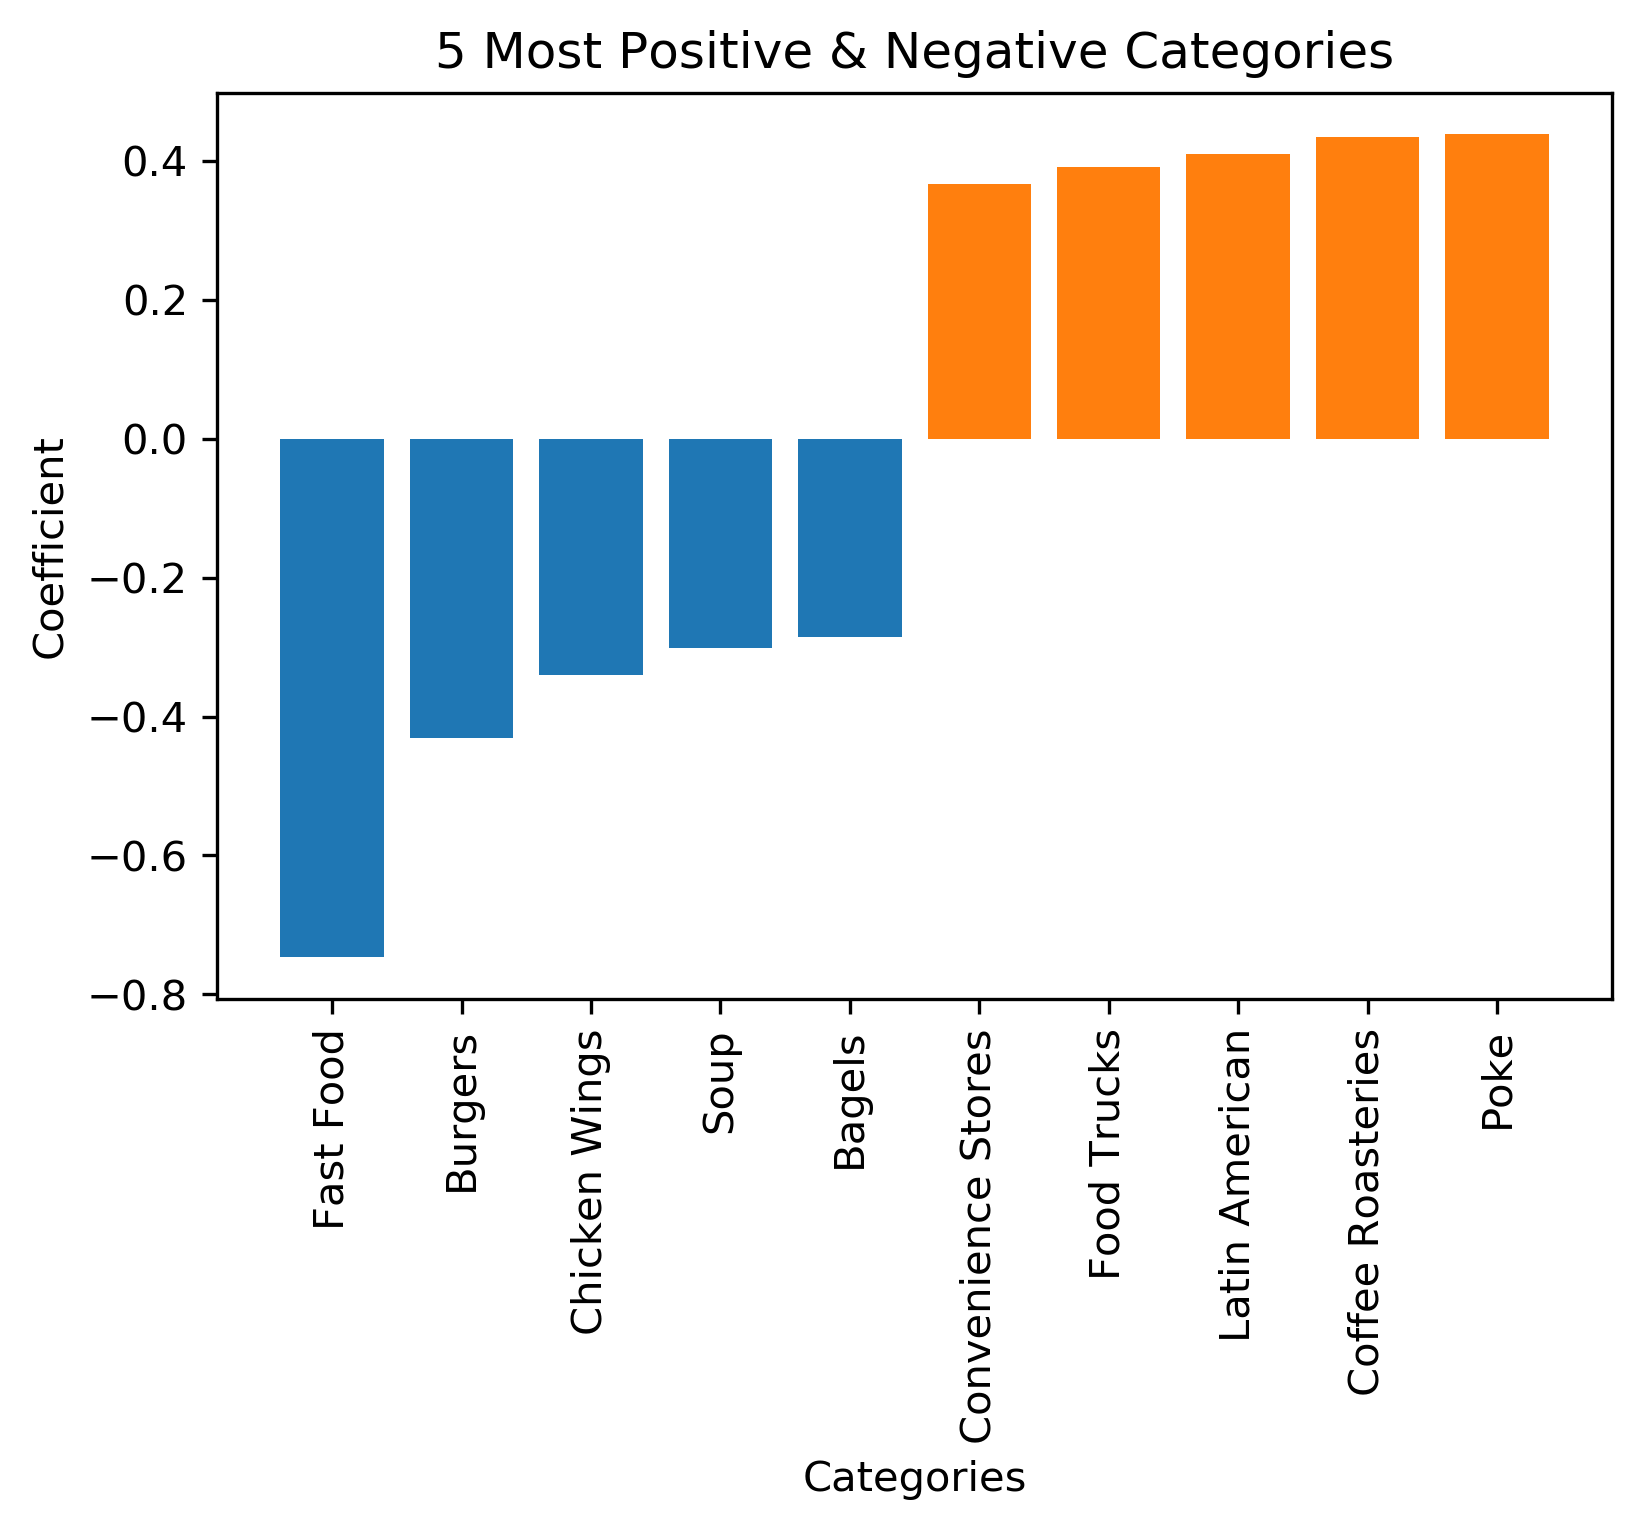

In [65]:
res = est.params.sort_values()
plt.figure(dpi=300)
plt.xticks(rotation='vertical')
plt.bar(range(0, 5), res.values[0:5])
plt.bar(range(5, 10), res.values[num_cat - 7:num_cat - 2])
plt.xticks(range(0, 10), res.index[0:5].tolist() + res.index[num_cat - 7:num_cat - 2].tolist())
plt.title('5 Most Positive & Negative Categories')
plt.xlabel('Categories')
plt.ylabel('Coefficient')
plt.show()

In [66]:
print(res.index)

Index(['Fast Food', 'Burgers', 'Chicken Wings', 'Soup', 'Bagels', 'Taiwanese',
       'Chinese', 'Imported Food', 'Ethnic Food', 'Donuts', 'Pasta Shops',
       'Lounges', 'Pizza', 'Seafood Markets', 'Sports Bars', 'Health Markets',
       'Canadian (New)', 'Coffee & Tea', 'American (Traditional)', 'Filipino',
       'Steakhouses', 'Bars', 'Arts & Entertainment', 'Meat Shops',
       'Food Delivery Services', 'Italian', 'Food Stands', 'Shopping',
       'Asian Fusion', 'Vegetarian', 'Sushi Bars', 'Chicken Shop', 'Diners',
       'Creperies', 'Indian', 'Seafood', 'Pubs', 'Greek', 'Salad', 'Beer',
       'Wine & Spirits', 'Mexican', 'Halal', 'Breakfast & Brunch',
       'Gastropubs', 'Southern', 'Delis', 'Japanese', 'Beer Bar', 'Sandwiches',
       'Comfort Food', 'Grocery', 'Nightlife', 'Korean',
       'Juice Bars & Smoothies', 'Venues & Event Spaces', 'Caterers',
       'Cocktail Bars', 'Middle Eastern', 'Delicatessen', 'Breweries',
       'Gluten-Free', 'American (New)', 'Desserts', 

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


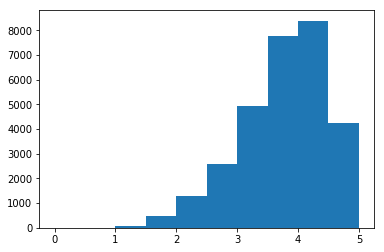

In [10]:
plt.hist(df2['stars'], bins = np.linspace(0,5,11))
print(np.linspace(0,5,11))

In [11]:
MSE = []
Y = df2['stars']

kf = KFold(n_splits = 10, shuffle = True)

test_errors = []
train_errors = []


for i in np.linspace(10,300,30):
    category_used = []

    for category, c in count.most_common(int(i)):
        category_used.append(category)
    
    category_used.remove('Restaurants')
    category_used.remove('Food')
    
    
    mat = []

    for restaurant in data:
        cat_bool = []
        for category in category_used:
            cat_bool.append(category in restaurant['categories'])
        cat_bool.append(restaurant['stars'])
        mat.append(cat_bool)

    df2 = pd.DataFrame(mat, columns = category_used + ['stars']) 
    
    X = df2[category_used]
    y = df2['stars']
    X = sm.add_constant(X)
    est = sm.OLS(y, X.astype(float)).fit()
    
#     X = data.iloc[:,i]
#     X = sm.add_constant(X)
#     model = sm.OLS(Y, X).fit()
    y_hat = est.predict(X) 
    MSE.append(mse(y, y_hat))
    
    
    test_error = []
    train_error = []

    for train_index, test_index in kf.split(df2):
        train, test = df2.iloc[train_index], df2.iloc[test_index]

        X = train[category_used]
        Y = train['stars']
        X = sm.add_constant(X)
        

        model = sm.OLS(Y, X.astype(float)).fit()
        y_hat = model.predict(X) 
        train_error.append(mse(Y, y_hat))

        X = test[category_used]
        Y = test['stars']
        X = sm.add_constant(X)

        y_hat = model.predict(X) 
        test_error.append(mse(Y, y_hat))

    test_errors.append(np.mean(test_error))
    train_errors.append(np.mean(train_error))




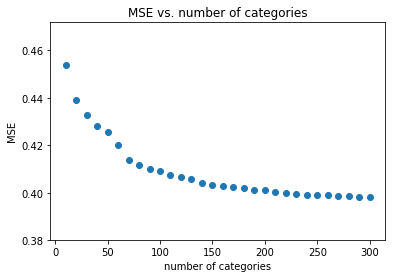

In [12]:
plt.scatter(np.linspace(10,300,30), MSE)
plt.title('MSE vs. number of categories')
plt.xlabel('number of categories')
plt.ylabel('MSE')
plt.show()

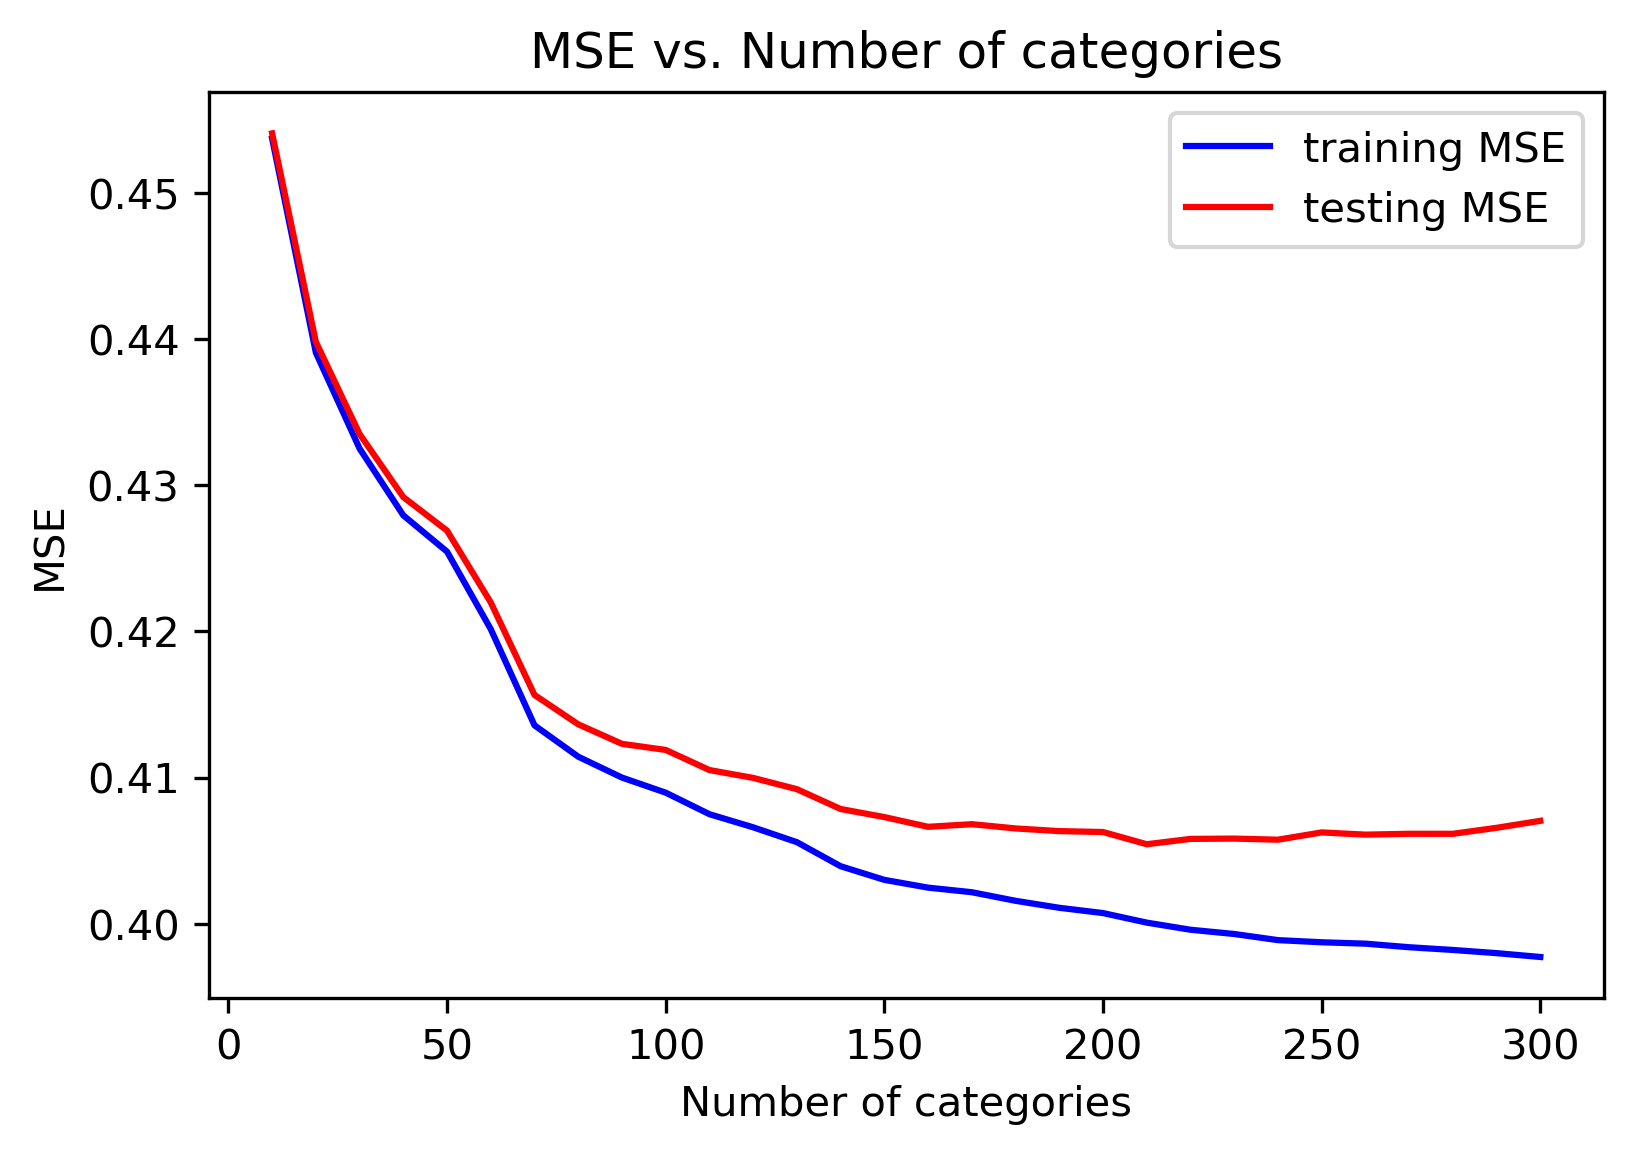

In [13]:
plt.figure(dpi=300)
plt.plot(np.linspace(10,300,30), train_errors, 'b', np.linspace(10,300,30), test_errors, 'r')
plt.title('MSE vs. Number of categories')
plt.xlabel('Number of categories')
plt.ylabel('MSE')
plt.legend(['training MSE', 'testing MSE'])
plt.show()